In [2]:
#Importing all the necessary libraries for the tasks

import json
from datetime import datetime
from sqlalchemy import create_engine
import gzip
import shutil
import os
import pandas as pd
from ast import literal_eval

In [3]:
'''Creating a function to read the Recipets JSON file and convert it into a pandas Dataframe to opreate and perform analysis upon'''
import gzip
import json

# Define the path to your gzip file
file_path = "C:/Users/skatti/Downloads/receipts.json.gz"
# brands = 'C:/Users/skatti/Downloads/brands.json.gz'
# users = 'C:/Users/skatti/Downloads/users.json.gz'
# Function to read and parse the JSON file
def read_gzip_json_lines(file_path):
    try:
        # Open the gzip file in text mode
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            data = []
            # Read the file line by line
            for line in f:
                # Parse each line as a JSON object
                data.append(json.loads(line.strip()))
            return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Call the function and print the data
receipts = read_gzip_json_lines(file_path)
receipts = pd.DataFrame(receipts)
    
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052


In [4]:
'''Column Data types and respective information'''
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    object 
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    object 
 14  userId                  

In [5]:
import gzip
import json
import pandas as pd

# Define the path to your gzip file
file_path = "C:/Users/skatti/Downloads/receipts.json.gz"

# Function to read and parse the JSON file
def read_gzip_json_lines(file_path):
    try:
        # Open the gzip file in text mode
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            data = []
            for line in f:
                data.append(json.loads(line.strip()))
            return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Read the file and load into a DataFrame
receipts = read_gzip_json_lines(file_path)
if receipts is not None:
    receipts = pd.DataFrame(receipts)

    # Check if the column exists
    if 'rewardsReceiptStatus' in receipts.columns:
        # Debugging: Check unique values and their counts
        print("Unique values in rewardsReceiptStatus before normalization:")
        print(receipts['rewardsReceiptStatus'].value_counts(dropna=False))

        # Normalize to uppercase to handle case sensitivity
        receipts['rewardsReceiptStatus'] = receipts['rewardsReceiptStatus'].str.upper()

        # Check unique values again
        print("Unique values in rewardsReceiptStatus after normalization:")
        print(receipts['rewardsReceiptStatus'].value_counts())

        # Filter for rows with 'ACCEPTED'
        accepted_receipts = receipts[receipts['rewardsReceiptStatus'] == 'ACCEPTED']
        print(f"Number of receipts with 'ACCEPTED' status: {len(accepted_receipts)}")
    else:
        print("Column 'rewardsReceiptStatus' not found in the DataFrame.")
else:
    print("Failed to load receipts.")

Unique values in rewardsReceiptStatus before normalization:
FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64
Unique values in rewardsReceiptStatus after normalization:
FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64
Number of receipts with 'ACCEPTED' status: 0


In [7]:
receipts['rewardsReceiptStatus'].value_counts()

ACCEPTED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64

In [9]:
import pandas as pd

brands = read_gzip_json_lines("C:/Users/skatti/Downloads/brands.json.gz")
brands = pd.DataFrame(brands)
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,False,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,False,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,False,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,False,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,False,TEST BRANDCODE @1612366146827


In [10]:
'''Creating a function to read the USERS JSON file and convert it into a pandas Dataframe to opreate and perform analysis upon'''

# Define the path to your gzip file
file_path = "C:/Users/skatti/Downloads/users.json.gz"

# Function to preprocess and load JSON
def read_gzip_json_with_pandas(file_path):
    data = []
    try:
        # Open the gzip file and read line by line
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            for i, line in enumerate(f, 1):  # Enumerate to track line numbers
                try:
                    if line.strip():  # Skip empty lines
                        data.append(json.loads(line.strip()))
                except json.JSONDecodeError as e:
                    print(f"Skipping invalid JSON at line {i}: {e}")
        # Convert the valid JSON objects to a Pandas DataFrame
        return pd.DataFrame(data)
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Call the function and display the data
users_df = read_gzip_json_with_pandas(file_path)

if users_df is not None and not users_df.empty:
    print("Users loaded successfully:")
    print(users_df.head())  # Display the first few rows
else:
    print("Failed to load receipts or the file is empty.")

Skipping invalid JSON at line 1: Expecting value: line 1 column 1 (char 0)
Skipping invalid JSON at line 496: Expecting value: line 1 column 1 (char 0)
Users loaded successfully:
                                    _id  active               createdDate  \
0  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
1  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
2  {'$oid': '5ff1e1eacfcf6c399c274ae6'}    True  {'$date': 1609687530554}   
3  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
4  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   

                  lastLogin      role signUpSource state  
0  {'$date': 1609687537858}  consumer        Email    WI  
1  {'$date': 1609687537858}  consumer        Email    WI  
2  {'$date': 1609687530597}  consumer        Email    WI  
3  {'$date': 1609687537858}  consumer        Email    WI  
4  {'$date': 1609687537858}  consumer        Email    WI  


In [11]:
users_df

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
3,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
489,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


In [12]:
''' Exploding columns in Receipts data to unpack dictionaries into useable values'''

receipts = receipts.explode('rewardsReceiptItemList')
receipts.reset_index(inplace=True)

In [13]:
receipts = receipts.fillna({'rewardsReceiptItemList':'{}'})
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(lambda x:str(x))
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(literal_eval)

In [14]:
# receipts_norm = pd.json_normalize(receipts['rewardsReceiptItemList'],errors='ignore',record_prefix='rewardsReceiptItemList')\
# .add_prefix('rewardsReceiptItemList.')

receipts_norm = pd.json_normalize(receipts['rewardsReceiptItemList'],errors='coerce',record_prefix='rewardsReceiptItemList')\
.add_prefix('rewardsReceiptItemList.')

In [15]:
receipts_final = pd.merge(receipts, receipts_norm, left_index=True, right_index=True, how='outer')

In [17]:
receipts_final

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7377,1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7378,1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
7379,1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN


In [20]:
"""Unpacking the key values from columns for usability"""
set(key for d in receipts_final['_id'] for key in d.keys())

{'$oid'}

In [21]:
set(key for d in receipts_final['createDate'] for key in d.keys())

{'$date'}

In [22]:
set(key for d in receipts_final['dateScanned'] for key in d.keys())

{'$date'}

In [23]:
{key for d in receipts_final.loc[receipts_final['finishedDate'].notna(), 'finishedDate'] for key in d.keys()}

{'$date'}

In [24]:
# modifyDate
{key for d in receipts_final.loc[receipts_final['modifyDate'].notna(), 'modifyDate'] for key in d.keys()}

{'$date'}

In [25]:
{key for d in receipts_final.loc[receipts_final['pointsAwardedDate'].notna(), 'pointsAwardedDate'] for key in d.keys()}

{'$date'}

In [26]:
{key for d in receipts_final.loc[receipts_final['purchaseDate'].notna(), 'purchaseDate'] for key in d.keys()}

{'$date'}

In [27]:
"""Converting the date varibales to have the YEAR-MONTH-DAY format"""
from datetime import datetime

def date_conv(x):
    # Convert the timestamp and format the date
    try:
        timestamp = int(x['$date']) / 1000
        return datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
    except:
        return(None)
    
receipts_final['_id'] = receipts_final['_id'].apply(lambda x:  date_conv(x))
receipts_final['createDate'] = receipts_final['createDate'].apply(lambda x: date_conv(x))
receipts_final['dateScanned'] = receipts_final['dateScanned'].apply(lambda x: date_conv(x))
receipts_final['finishedDate'] = receipts_final['finishedDate'].apply(lambda x: date_conv(x))
receipts_final['modifyDate'] = receipts_final['modifyDate'].apply(lambda x: date_conv(x))
receipts_final['pointsAwardedDate'] = receipts_final['pointsAwardedDate'].apply(lambda x: date_conv(x))
receipts_final['purchaseDate'] = receipts_final['purchaseDate'].apply(lambda x: date_conv(x))

In [28]:
receipts_final.head()

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,0,None,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,None,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,None,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,None,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,None,2021-01-03 15:25:42,None,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,None,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
receipts_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 0 to 7380
Data columns (total 50 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   index                                                      7381 non-null   int64  
 1   _id                                                        0 non-null      object 
 2   bonusPointsEarned                                          5980 non-null   float64
 3   bonusPointsEarnedReason                                    5980 non-null   object 
 4   createDate                                                 7381 non-null   object 
 5   dateScanned                                                7381 non-null   object 
 6   finishedDate                                               5970 non-null   object 
 7   modifyDate                                                 7381 non-null   object 
 8   pointsAw

In [31]:
"""Ensure 'rewardsReceiptItemList' and other complex columns are converted to strings or dropped."""

receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].astype(str)
receipts['_id'] = receipts['_id'].astype(str)
receipts['bonusPointsEarnedReason'] = receipts['bonusPointsEarnedReason'].astype(str)
receipts['totalSpent'] = pd.to_numeric(receipts['totalSpent'], errors='coerce')

In [32]:
users_df.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
3,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [33]:
''' Transforming and unpacking the Users Table such that _id, creaedDate and lastLogin have
valid and legible row values'''

from datetime import datetime

# Function to extract the `$oid` value from `_id` if it exists
def extract_oid(x):
    if isinstance(x, dict) and '$oid' in x:
        return x['$oid']
    else:
        print(f"Invalid _id: {x}")
        return None

# Function to convert the `$date` field to a human-readable datetime string
def convert_date(x):
    if isinstance(x, dict) and '$date' in x:
        try:
            return datetime.utcfromtimestamp(x['$date'] / 1000).strftime('%Y-%m-%d %H:%M:%S')
        except (TypeError, ValueError, OverflowError) as e:
            print(f"Error converting date: {x}, error: {e}")
            return None
    else:
        print(f"Invalid date: {x}")
        return None

# Apply the transformations
users_df['_id'] = users_df['_id'].apply(extract_oid)
users_df['createdDate'] = users_df['createdDate'].apply(convert_date)
users_df['lastLogin'] = users_df['lastLogin'].apply(convert_date)

Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid date: nan
Invalid da

In [34]:
users_df.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
3,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


In [35]:
users_df.describe()

,_id,active,createdDate,lastLogin,role,signUpSource,state
count,494,494,494,432,494,446,438
unique,212,2,212,171,2,2,8
top,54943462e4b07e684157a532,True,2020-12-03 22:08:03,2021-02-26 22:39:16,consumer,Email,WI
freq,20,493,20,20,412,442,395


In [37]:
set().union(*(d.keys() for d in brands['cpg']))

{'$id', '$ref'}

In [38]:
"""Normalizing column values"""

brands_norm = pd.json_normalize(brands['cpg'])
brands_norm = brands_norm.add_prefix('cpg.')

In [39]:
brands_norm

,cpg.$ref,cpg.$id.$oid
0,Cogs,601ac114be37ce2ead437550
1,Cogs,5332f5fbe4b03c9a25efd0ba
2,Cogs,601ac142be37ce2ead437559
3,Cogs,601ac142be37ce2ead437559
4,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...
1162,Cogs,5f77274dbe37ce6b592e90bf
1163,Cogs,53e10d6368abd3c7065097cc
1164,Cogs,5332fa12e4b03c9a25efd1e7
1165,Cogs,5332f5f6e4b03c9a25efd0b4


In [40]:
final_brands_data = pd.merge(brands, brands_norm, left_index=True, right_index=True, how='outer')

In [41]:
final_brands_data.shape

(1167, 10)

In [42]:
final_brands_data['_id'] = final_brands_data['_id'].apply(lambda x: x['$oid'])

In [43]:
final_brands_data.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,False,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,False,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,False,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,False,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,False,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


In [44]:
"""Creating a SQLite engine to load DataFrames as tables and perform SQL queries upon them"""

engine = create_engine('sqlite://', echo=False)
     
users_df.drop_duplicates(subset=['_id']).to_sql('users',con=engine)
     
receipts_final.columns = receipts_final.columns.str.replace(".", "_")
     
receipts_final['purchaseDate'] = pd.to_datetime(receipts_final['purchaseDate'], unit='ms', errors='coerce')
# receipts_final = receipts_final[receipts_final['purchaseDate'].notnull()]  # Drop rows with invalid dates     
receipts_final.drop(columns=['rewardsReceiptItemList'],axis=1).to_sql('receipts',con=engine)

final_brands_data.drop_duplicates(subset=['brandCode']).drop(columns=['cpg'],axis=1).to_sql('brands',con=engine)

<ipython-input-44-6c56059f9a9b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  receipts_final.columns = receipts_final.columns.str.replace(".", "_")


# Second: Write queries that directly answer predetermined questions from a business stakeholder

# When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [54]:
import pandas as pd
from sqlalchemy import create_engine

# query = """SELECT * from (SELECT r.rewardsReceiptItemList_brandCode,SUM(r.totalSpent) as summedTotalSpent from receipts r where r.userId in (SELECT _id from users u where u.createdDate > (SELECT strftime('%Y-%m-%d %H:%M:%S', 'now','-6 month'))) group by r.rewardsReceiptItemList_brandCode) where rewardsReceiptItemList_brandCode is not NULL order by summedTotalSpent DESC LIMIT 1;"""
query = """select rewardsReceiptStatus as Status,avg(totalSpent) as AVG_SPEND_PER_STATUS from receipts where rewardsReceiptStatus = 'ACCEPTED' or rewardsReceiptStatus = 'REJECTED' group by rewardsReceiptStatus"""
avg_Spend_status = pd.read_sql(query, con=engine)
# Display the result
print(avg_Spend_status)

print("\nAnalysis of the results: As we can see, ACCEPTED status has average spend per user way higher than Rejected. ACCEPTED has $1244.37 spend per user and REJECTED status has $19.54 spend per user")

     Status  AVG_SPEND_PER_STATUS
0  ACCEPTED           1244.372934
1  REJECTED             19.544970

Analysis of the results:As we can see, ACCEPTED status has average spend per user way higher than Rejected. ACCEPTED has $1244.37 spend per user and REJECTED status has $19.54 spend per user


# When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [55]:
query = """ SELECT
    rewardsReceiptStatus as Status, SUM(purchasedItemCount) AS total_items_purchased
FROM receipts
WHERE rewardsReceiptStatus IN ('ACCEPTED', 'REJECTED')
GROUP BY rewardsReceiptStatus
"""

top_brands = pd.read_sql(query, con=engine)
# Display the result
print(top_brands)
print("\nAnalysis of the results: Accepted has very high number of totalItemsPurchased compared to Rejcted from Receipts table. \nIt goes to say that if the REWARD is accepted from the user there is higher chance of the user purchaing bigger number of items and this should be taken into business contect to have more users accept Rewards.  ")

     Status  total_items_purchased
0  ACCEPTED              1364998.0
1  REJECTED                  740.0

Analysis of the results: Accepted has very high number of totalItemsPurchased compared to Rejcted from Receipts table. 
It goes to say that if the REWARD is accepted from the user there is higher chance of the user purchaing bigger number of items and this should be taken into business contect to have more users accept Rewards.  


# Third: Evaluate Data Quality Issues in the Data Provided

### There are NA and missing number values in a some columns which need to be visualized to understand problems in the given data 

[]

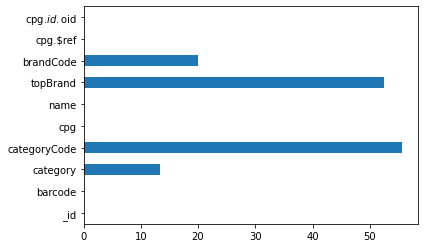

In [48]:
'''Visualzing BRANDS table NA values as %'''

import matplotlib.pyplot as plt
brands_null =  final_brands_data.isnull().sum() * 100/len(final_brands_data)

brands_null.plot(kind = 'barh')
plt.plot()

[]

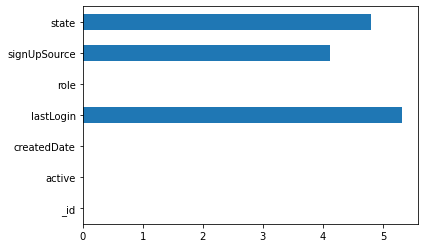

In [49]:
'''Visualzing USERS table NA values as %'''

users_null =  users_df.isnull().sum() * 100/len(final_brands_data)

users_null.plot(kind = 'barh')
plt.plot()

[]

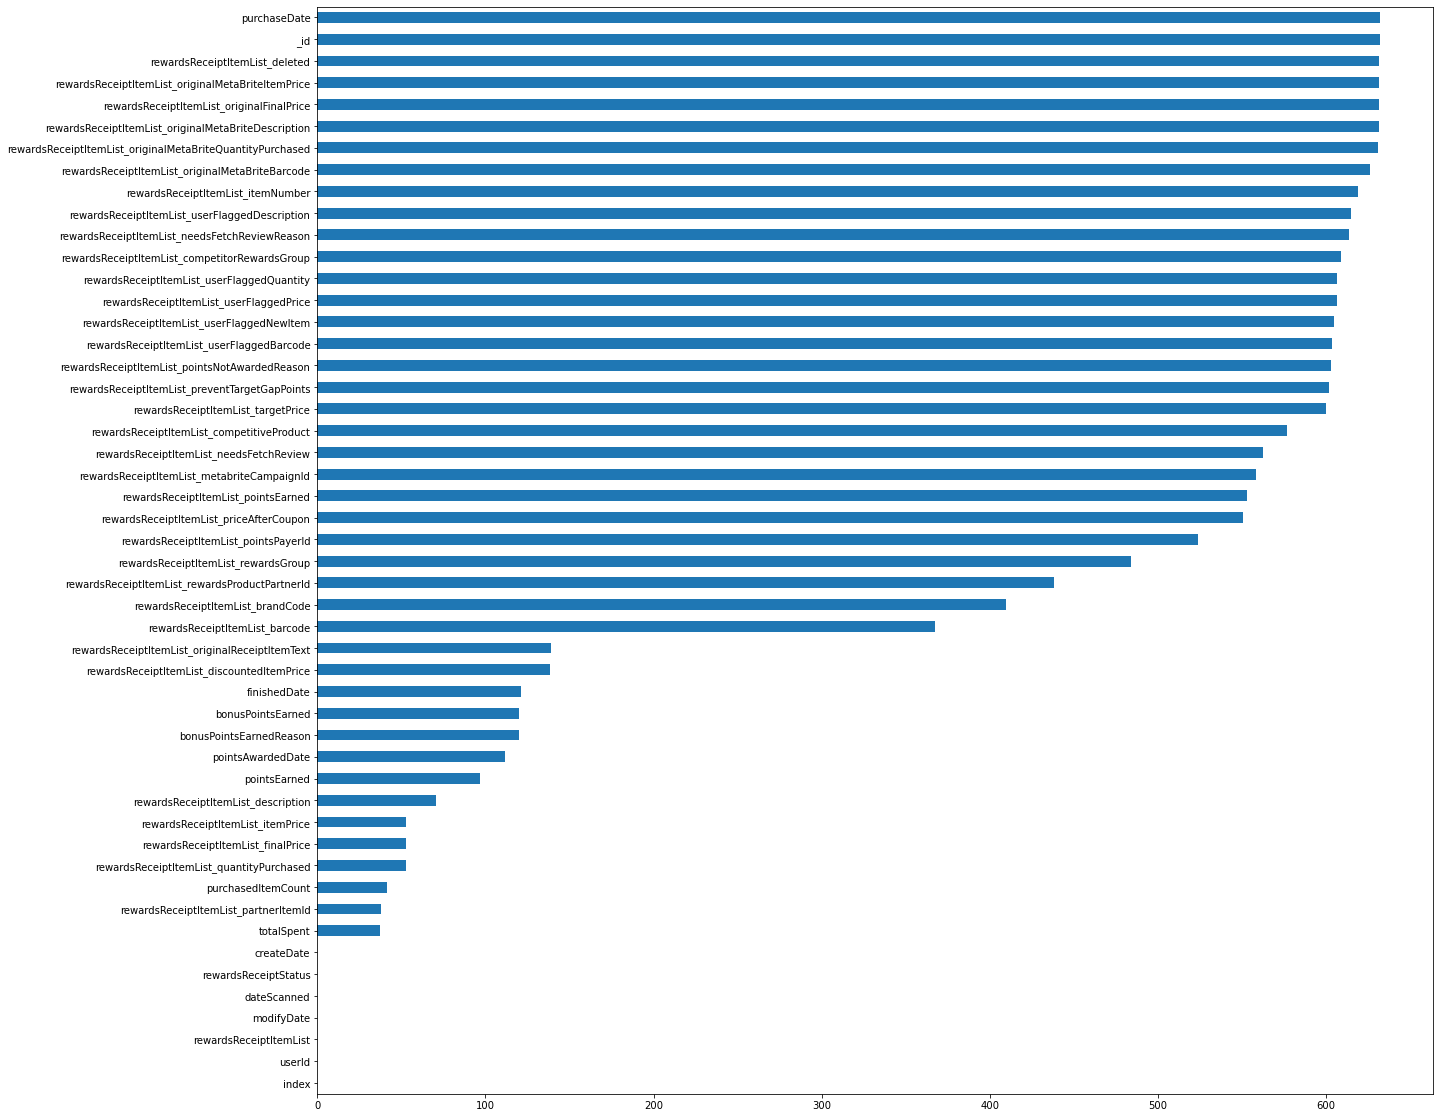

In [50]:
'''Visualzing RECEIPTS table NA values as %'''

receipts_final

receipts_null =  receipts_final.isnull().sum().sort_values(ascending=True) * 100/len(final_brands_data)
plt.figure(figsize = (20,20))
receipts_null.plot(kind = 'barh')
plt.plot()

# Checking numerical distribution

### Checking potential outliers to see if the max value is greater than the mean + standard deviation * user defined sigma values

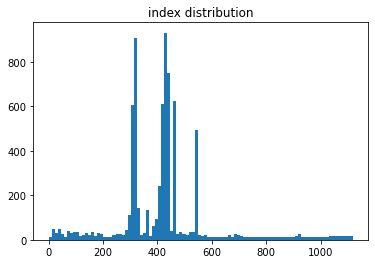

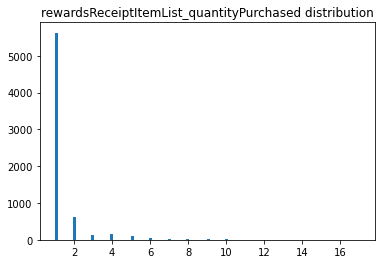

In [51]:
# create a function to plot the histogram
def plot_col_distribution(df, col, bins):
  df[col].hist(bins=bins)
  plt.title(col+" distribution")
  plt.gca().grid(False) 
  plt.show()

# create a function to show histograms for columns whose maximum value
# is greater than a user-defined sigma value
def plot_potential_outliers(df, num_sigma, bins):
  stats = df.describe().transpose()
  cols = stats[stats['max'] > stats['mean'] + stats['std'] * num_sigma].index.tolist()
  for col in cols:
    plot_col_distribution(df, col, bins=bins)

# use the function to see the columns whose maximum is greater than 3 std
plot_potential_outliers(receipts_final, 3, 100)